## `scattergeo` - Interactive Scatter Plot Maps
### Plotting NOAA Data from Shapefiles

This notebook will explore Plotly's `scattergeo` chart type. We'll explore rain bucket telemetry data from the National Weather Service. This data, served from a NOAA ftp server, is compressed in `tar.gz` files and shapefiles.
This tutorial uses:
- IPython notebook, a web-based python development environment
- Pandas, for tabular data wrangling
- `shapefile`, for parsing `.shp` files
- Plotly, for web-based interactive plotting of maps

#### Part 1 - Download and parse the data

NOAA NWS data here: http://www.srh.noaa.gov/ridge2/RFC_Precip/ and here: http://www.srh.noaa.gov/ridge2/Precip/qpehourlyshape/latest/

In [1]:
!mkdir nws_precip
!curl http://www.srh.noaa.gov/ridge2/Precip/qpehourlyshape/latest/last_1_hours.tar.gz >> "nws_precip/precip.tar.gz"
!tar -xvf nws_precip/precip.tar.gz -C nws_precip
!ls nws_precip/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2570k    0 2570k    0     0   641k      0 --:--:--  0:00:04 --:--:--  723k
x latest/last_1_hours.dbf
x latest/last_1_hours.shp
x latest/last_1_hours.shx
x latest/last_1_hours.prj
latest        precip.tar.gz


In [2]:
ls nws_precip/

latest/        precip.tar.gz


In [3]:
!ls -l nws_precip/latest

total 5136
-rw-r--r--  1 chris  staff  1594041 29 Jun 16:48 last_1_hours.dbf
-rw-r--r--  1 chris  staff      134 29 Jun 16:48 last_1_hours.prj
-rw-r--r--  1 chris  staff   797008 29 Jun 16:48 last_1_hours.shp
-rw-r--r--  1 chris  staff   227788 29 Jun 16:48 last_1_hours.shx


In [4]:
import shapefile
import pandas as pd
import plotly.plotly as py

In [5]:
shp = shapefile.Reader('nws_precip/latest/last_1_hours.shp')

In [6]:
shp.fields

[('DeletionFlag', 'C', 1, 0),
 ['Id', 'N', 11, 0],
 ['Hrapx', 'N', 6, 0],
 ['Hrapy', 'N', 6, 0],
 ['Lat', 'N', 7, 4],
 ['Lon', 'N', 9, 4],
 ['Globvalue', 'N', 16, 2]]

In [7]:
shp.records()

[[514, 528, 10, 24.8285, -100.4168, 0.04],
 [519, 533, 10, 24.8152, -100.2378, 0.07],
 [520, 534, 10, 24.8125, -100.2021, 0.17],
 [521, 535, 10, 24.8098, -100.1663, 0.12],
 [522, 536, 10, 24.807, -100.1305, 0.06],
 [523, 537, 10, 24.8042, -100.0948, 0.04],
 [524, 538, 10, 24.8014, -100.059, 0.09],
 [525, 539, 10, 24.7986, -100.0233, 0.06],
 [526, 540, 10, 24.7958, -99.9875, 0.04],
 [2089, 527, 11, 24.8636, -100.4497, 0.05],
 [2090, 528, 11, 24.861, -100.4139, 0.04],
 [2095, 533, 11, 24.8477, -100.2349, 0.07],
 [2096, 534, 11, 24.845, -100.1991, 0.22],
 [2097, 535, 11, 24.8422, -100.1633, 0.15],
 [2098, 536, 11, 24.8395, -100.1275, 0.06],
 [2099, 537, 11, 24.8367, -100.0917, 0.08],
 [2100, 538, 11, 24.8339, -100.0559, 0.09],
 [2101, 539, 11, 24.8311, -100.0201, 0.05],
 [2102, 540, 11, 24.8282, -99.9844, 0.03],
 [3664, 526, 12, 24.8987, -100.4827, 0.03],
 [3665, 527, 12, 24.8961, -100.4469, 0.02],
 [3666, 528, 12, 24.8935, -100.411, 0.02],
 [3670, 532, 12, 24.8829, -100.2677, 0.02],
 [36

In [8]:
df = pd.DataFrame(shp.records(), columns=[fld[0] for fld in shp.fields[1:]])
df.head()

,Id,Hrapx,Hrapy,Lat,Lon,Globvalue
0,514,528,10,24.8285,-100.4168,0.04
1,519,533,10,24.8152,-100.2378,0.07
2,520,534,10,24.8125,-100.2021,0.17
3,521,535,10,24.8098,-100.1663,0.12
4,522,536,10,24.8070,-100.1305,0.06


Nice! This data was really well structured - we went from a shapefile to a dataframe in just a couple of lines of code. 

#### Part 2 - Graph the data

In [9]:
len(df)

28461

That's a lot of rows! The interactivity for Plotly's geoscatter plots starts to slow down around 20k-30k points. To just get a glance at all of the data, we'll just generate a static image of the plot first with `plotly.image.ishow`.

We'll create a scatter plot where each point represents a rain bucket and is colored by the amount of rain that it receives.

Since points may overlap, and we want to see the rainiest buckets, we'll sort the data from least rainiest bucket to most rainiest, so that the rainiest buckets are plotted last, on top of of all of the  other points.

In [10]:
df.sort(columns=['Globvalue'], inplace=True)

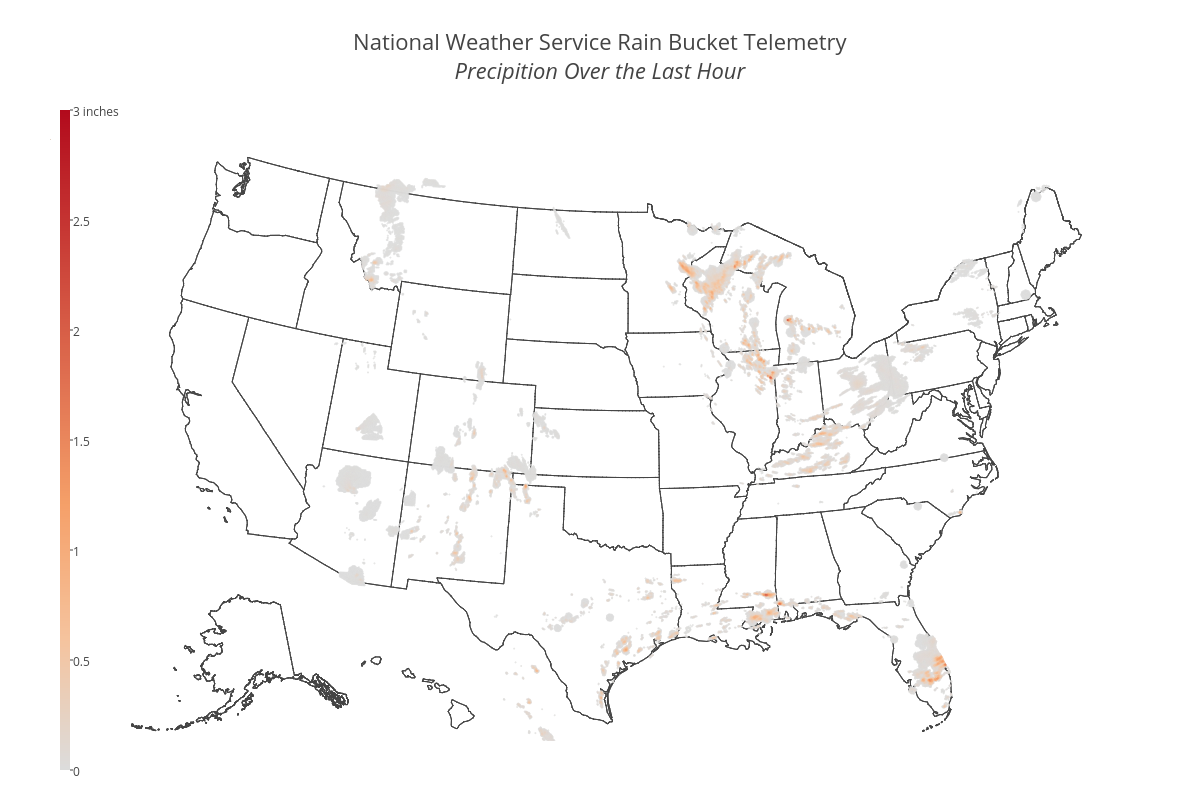

In [11]:
fig = {
    'data': 
        [
            {
                'lat': df['Lat'],
                'lon': df['Lon'],
                'marker': {
                    'color': df['Globvalue'],
                    'opacity': 0.7,
                    'size': 2,
                    'cmin': 0,
                    'cmax': 3.0,
                    'colorbar':{
                        'thickness':10,
                        'titleside':"right",
                        'x':0,
                        'y':0.5,
                        'outlinecolor':"rgba(68, 68, 68, 0)",
                        'ticks':"outside",
                        'ticklen':3,
                        'showticksuffix':"last",
                        'ticksuffix':" inches",
                        'dtick': 0.5
                    },                
                },
                'type': 'scattergeo'
            }
        ],
    'layout': {
        'geo': {
            'scope': 'usa',
            'resolution': '50' # highest resolution for images
        },
        'margin': {
            'l': 50,
            'r': 0,
            'b': 20
        },
        'title': 'National Weather Service Rain Bucket Telemetry<br><i>Precipition Over the Last Hour</i>',
        'titlefont': {
            'size': 22
        }
    }
}

py.image.ishow(fig, width=1200, height=800)

In [12]:
rainiest = df[-10000:]

fig['data'][0].update({
    'lat': rainiest['Lat'],
    'lon': rainiest['Lon'],
    'text': rainiest['Globvalue'].apply(lambda r: str(r)+' inches'),
    'name': ''
})

fig['data'][0]['marker'].update({
    'color': rainiest['Globvalue']
})

fig['layout']['title'] = 'National Weather Service Rain Bucket Telemetry<br>'+\
                         '<i>Rainiest 10k Locations Over the Last Hour</i>'

fig['layout']['geo'].pop('resolution', None) # lower resolution for interactivity

    
py.iplot(fig, filename='maps/NWS - Rainest 10k', validate=False)

In [13]:
from IPython.core.display import HTML
import urllib2
# HTML(urllib2.urlopen('https://raw.githubusercontent.com/plotly/python-user-guide/css-updates/custom.css').read())
HTML('<style>'+
     urllib2.urlopen('https://plot.ly/gh-pages/documentation/static/css/userguide_style.css').read()+
    '</style>')

In [14]:
# Prepare the notebook for publication

import json
fn = 'NWS-Rainfall-Telemetry.ipynb' # is there a way to grab this dynamically? also to force a notebook save?
tmpfn = 'temp-{}'.format(fn)
nbjson = json.load(open(fn))
nbjson['cells'] = nbjson['cells'][:-6]
with open(tmpfn, 'w') as f:
    f.write(json.dumps(nbjson))

In [15]:
! ipython nbconvert temp-NWS-Rainfall-Telemetry.ipynb --to html --template basic
! tail temp-NWS-Rainfall-Telemetry.html

[NbConvertApp] Using existing profile dir: u'/Users/chris/.ipython/profile_default'
[NbConvertApp] Converting notebook temp-NWS-Rainfall-Telemetry.ipynb to html
[NbConvertApp] Support files will be in temp-NWS-Rainfall-Telemetry_files/
[NbConvertApp] Loaded template basic.tpl
[NbConvertApp] Writing 407560 bytes to temp-NWS-Rainfall-Telemetry.html
<div class="output_html rendered_html output_subarea output_execute_result">
<iframe id="igraph" scrolling="no" style="border:none;"seamless="seamless" src="https://plot.ly/~chris/15082.embed" height="525" width="100%"></iframe>
</div>

</div>

</div>
</div>

</div>

In [18]:
with open('2015-06-29-'+fn.replace('.ipynb', '.html'), 'w') as f:
    f.write('\n'.join([''
        '---',
        'permalink: python/shapefiles/',
        'layout: user-guide',
        'page_type: u-guide',
        'description: A tutorial on how to plot shapefiles as a scatter plot map in Python',
        'name: Scatter Plot Maps and Shapefiles in Python | Plotly',
        'language: python',
        'has_thumbnail: false',
        'thumbnail: /images/static-image.png',
        '---',
        ''
    ]))

!cat temp-NWS-Rainfall-Telemetry.html >> 2015-06-29-NWS-Rainfall-Telemetry.html
!head 2015-06-29-NWS-Rainfall-Telemetry.html
!rm temp*

---
permalink: python/shapefiles/
layout: user-guide
page_type: u-guide
description: A tutorial on how to plot shapefiles as a scatter plot map in Python
name: Scatter Plot Maps and Shapefiles in Python | Plotly
language: python
has_thumbnail: false
thumbnail: /images/static-image.png
---
